<a href="https://colab.research.google.com/github/HSN51/Data-Analysis-Project/blob/main/DataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project

This project will apply basic data analysis techniques using the `Students Performance in Exams` dataset.

In [1]:
# I installed the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading and uploading the dataset from Kaggle
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

# I loaded the dataset
data = pd.read_csv('StudentsPerformance.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 14.0MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


## Veri Setinin Genel Görünümü

In [2]:
# I displayed the first few rows of the dataset
data.head()

# General information about the dataset
data.info()

# I displayed basic statistical information
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Keşifsel Veri Analizi (EDA)

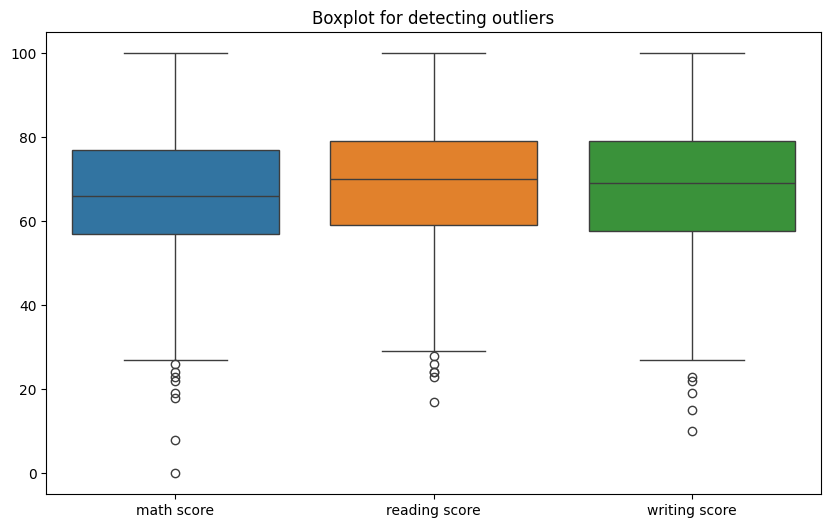

In [3]:
# I checked for missing data
data.isnull().sum()

# I visualized outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot for detecting outliers')
plt.show()

## Temel İstatistiksel Analizler

In [7]:
# I selected only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# I reviewed basic statistical metrics
print("Mean:\n", numeric_data.mean())
print("Median:\n", numeric_data.median())
print("Standard Deviation:\n", numeric_data.std())


Mean:
 math score       66.089
reading score    69.169
writing score    68.054
dtype: float64
Median:
 math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
Standard Deviation:
 math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


## Görselleştirme

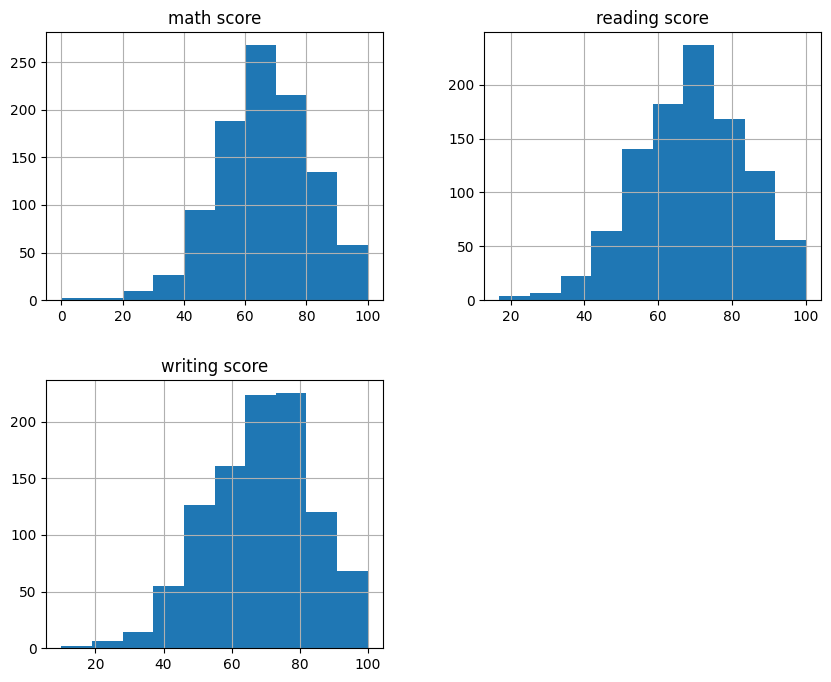

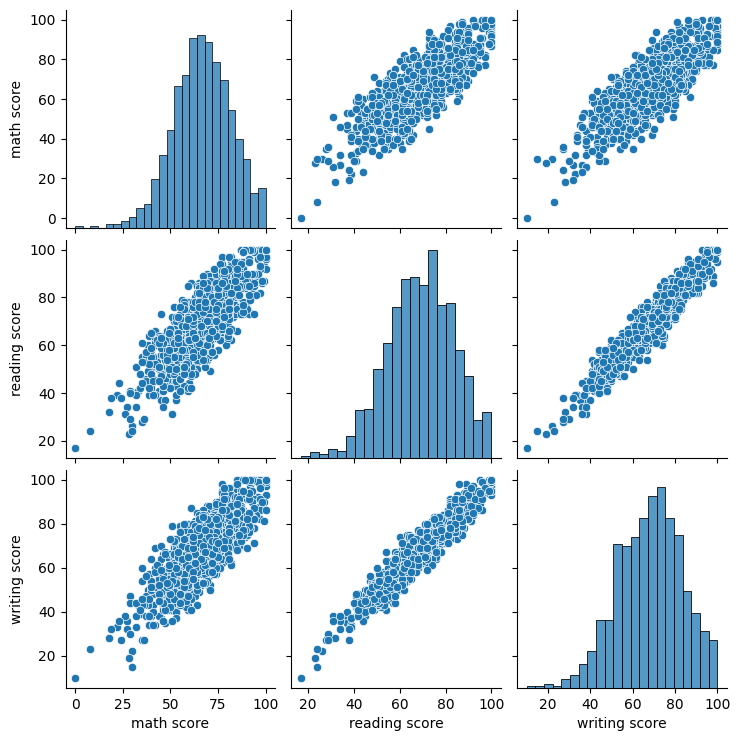

In [5]:
# Histograms
data.hist(figsize=(10, 8))
plt.show()

# Scatter plot
sns.pairplot(data)
plt.show()

## Değişkenler Arası İlişkilerin Analizi

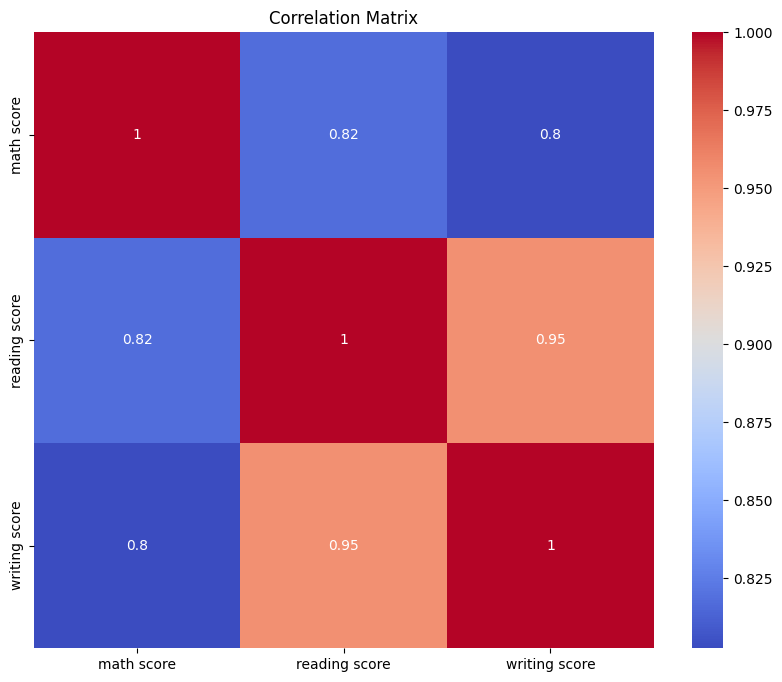

In [8]:
# I selected only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Özellik Mühendisliği (Feature Engineering)

In [9]:
# I created new features
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['average_score'] = data['total_score'] / 3

# I displayed the first few lines of new features
print(data[['math score', 'reading score', 'writing score', 'total_score', 'average_score']].head())

   math score  reading score  writing score  total_score  average_score
0          72             72             74          218      72.666667
1          69             90             88          247      82.333333
2          90             95             93          278      92.666667
3          47             57             44          148      49.333333
4          76             78             75          229      76.333333


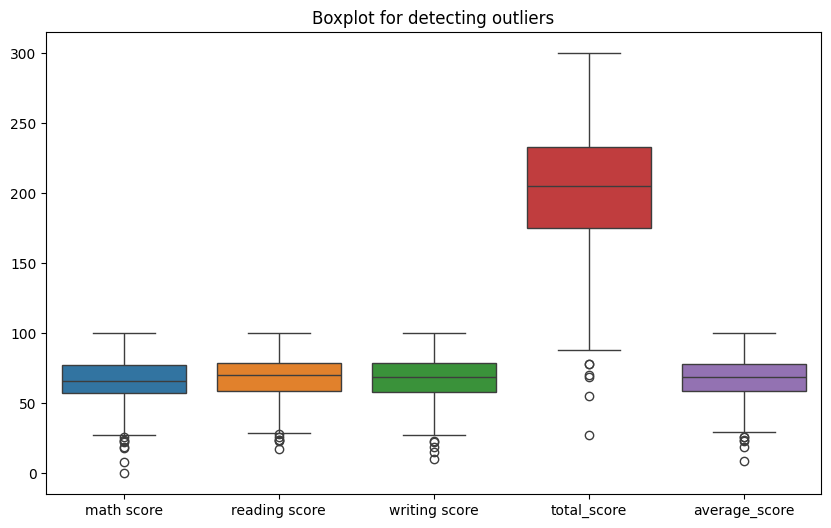

In [10]:
# I detected outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['math score', 'reading score', 'writing score', 'total_score', 'average_score']])
plt.title('Boxplot for detecting outliers')
plt.show()

In [12]:
# I checked for missing data
print(data.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total_score                    0
average_score                  0
dtype: int64
